<a href="https://colab.research.google.com/github/Kavya2099/British-Airways-virtual-internship/blob/main/British_Airways_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | My recent experience with B...
1,✅ Trip Verified | This is to express our disp...
2,✅ Trip Verified | I flew London to Malaga on ...
3,✅ Trip Verified | I arrived at the airport ab...
4,"✅ Trip Verified | Filthy plane, cabin staff o..."


In [4]:
df

,reviews
0,✅ Trip Verified | My recent experience with B...
1,✅ Trip Verified | This is to express our disp...
2,✅ Trip Verified | I flew London to Malaga on ...
3,✅ Trip Verified | I arrived at the airport ab...
4,"✅ Trip Verified | Filthy plane, cabin staff o..."
...,...
995,✅ Trip Verified | Abu Dhabi to London. Althou...
996,✅ Trip Verified | Gatwick to Orlando. Stains ...
997,✅ Trip Verified | Newcastle to Las Vegas via L...
998,✅ Trip Verified | While it is still fresh in ...


Removing the parts before | in the reviews column

In [5]:
df.reviews= df.reviews.str.split('|',expand=True)[1]

In [6]:
df

,reviews
0,My recent experience with British Airways wa...
1,This is to express our displeasure and conce...
2,I flew London to Malaga on 27 August in Club...
3,I arrived at the airport about 2.5 hours bef...
4,"Filthy plane, cabin staff ok, appalling cust..."
...,...
995,"Abu Dhabi to London. Although a BA flight, t..."
996,"Gatwick to Orlando. Stains on the seat, cott..."
997,Newcastle to Las Vegas via London. Both my fl...
998,"While it is still fresh in my mind, I’d like..."


# Step 1: Cleaning the text

In [12]:
import re

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,Cleaned Reviews
0,My recent experience with British Airways wa...,My recent experience with British Airways was...
1,This is to express our displeasure and conce...,This is to express our displeasure and concer...
2,I flew London to Malaga on 27 August in Club...,I flew London to Malaga on August in Club Eur...
3,I arrived at the airport about 2.5 hours bef...,I arrived at the airport about hours before t...
4,"Filthy plane, cabin staff ok, appalling cust...",Filthy plane cabin staff ok appalling custome...


# Step 2: Tokenization

Tokenization is the process of breaking the text into smaller pieces called Tokens. It can be performed at sentences(sentence tokenization) or word level(word tokenization).

# Step 3: Enrichment – POS tagging

Parts of Speech (POS) tagging is a process of converting each token into a tuple having the form (word, tag). POS tagging essential to preserve the context of the word and is essential for Lemmatization.

# Step 4: Stopwords removal
Stopwords in English are words that carry very little useful information. We need to remove them as part of text preprocessing. nltk has a list of stopwords of every language. 

# Step 5: Obtaining the stem words
A stem is a part of a word responsible for its lexical meaning. The two popular techniques of obtaining the root/stem words are Stemming and Lemmatization.

The key difference is Stemming often gives some meaningless root words as it simply chops off some characters in the end. Lemmatization gives meaningful root words, however, it requires POS tags of the words.


 
```
NLTK is a leading platform for building Python programs to work with human language data. 

```

```
It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along 
with a suite of text processing libraries for classification, tokenization, stemming, tagging, 
parsing, and semantic reasoning, wrappers for industrial-strength NLP libraries
```




In [14]:
import nltk

"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, 
collocations, and words that start sentences. """

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [15]:
#The nltk.corpus package defines a collection of corpus reader classes, which can be used to access the contents of a diverse set of corpora.


nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist 

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,reviews,Cleaned Reviews,POS tagged
0,My recent experience with British Airways wa...,My recent experience with British Airways was...,"[(recent, a), (experience, n), (British, n), (..."
1,This is to express our displeasure and conce...,This is to express our displeasure and concer...,"[(express, v), (displeasure, n), (concerns, n)..."
2,I flew London to Malaga on 27 August in Club...,I flew London to Malaga on August in Club Eur...,"[(flew, v), (London, n), (Malaga, n), (August,..."
3,I arrived at the airport about 2.5 hours bef...,I arrived at the airport about hours before t...,"[(arrived, v), (airport, n), (hours, n), (take..."
4,"Filthy plane, cabin staff ok, appalling cust...",Filthy plane cabin staff ok appalling custome...,"[(Filthy, n), (plane, n), (cabin, n), (staff, ..."


In [17]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,My recent experience with British Airways wa...,My recent experience with British Airways was...,"[(recent, a), (experience, n), (British, n), (...",recent experience British Airways horrendous...
1,This is to express our displeasure and conce...,This is to express our displeasure and concer...,"[(express, v), (displeasure, n), (concerns, n)...",express displeasure concern regard flight It...
2,I flew London to Malaga on 27 August in Club...,I flew London to Malaga on August in Club Eur...,"[(flew, v), (London, n), (Malaga, n), (August,...",fly London Malaga August Club Europe stand a...
3,I arrived at the airport about 2.5 hours bef...,I arrived at the airport about hours before t...,"[(arrived, v), (airport, n), (hours, n), (take...",arrive airport hour takeoff time get check g...
4,"Filthy plane, cabin staff ok, appalling cust...",Filthy plane cabin staff ok appalling custome...,"[(Filthy, n), (plane, n), (cabin, n), (staff, ...",Filthy plane cabin staff ok appal customer s...


In [18]:
df[['reviews','Lemma']]

,reviews,Lemma
0,My recent experience with British Airways wa...,recent experience British Airways horrendous...
1,This is to express our displeasure and conce...,express displeasure concern regard flight It...
2,I flew London to Malaga on 27 August in Club...,fly London Malaga August Club Europe stand a...
3,I arrived at the airport about 2.5 hours bef...,arrive airport hour takeoff time get check g...
4,"Filthy plane, cabin staff ok, appalling cust...",Filthy plane cabin staff ok appal customer s...
...,...,...
995,"Abu Dhabi to London. Although a BA flight, t...",Abu Dhabi London Although BA flight sector o...
996,"Gatwick to Orlando. Stains on the seat, cott...",Gatwick Orlando Stains seat cotton bud seat ...
997,Newcastle to Las Vegas via London. Both my fl...,Newcastle Las Vegas via London flight great ...
998,"While it is still fresh in my mind, I’d like...",still fresh mind like commend hard work crew...


# Sentiment Analysis using VADER

VADER stands for Valence Aware Dictionary and Sentiment Reasoner.

Vader sentiment not only tells if the statement is positive or negative along with the intensity of emotion.



In [19]:
!pip install vaderSentiment

In [20]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,My recent experience with British Airways wa...,My recent experience with British Airways was...,"[(recent, a), (experience, n), (British, n), (...",recent experience British Airways horrendous...,-0.9272,Negative
1,This is to express our displeasure and conce...,This is to express our displeasure and concer...,"[(express, v), (displeasure, n), (concerns, n)...",express displeasure concern regard flight It...,-0.4588,Negative
2,I flew London to Malaga on 27 August in Club...,I flew London to Malaga on August in Club Eur...,"[(flew, v), (London, n), (Malaga, n), (August,...",fly London Malaga August Club Europe stand a...,-0.7430,Negative
3,I arrived at the airport about 2.5 hours bef...,I arrived at the airport about hours before t...,"[(arrived, v), (airport, n), (hours, n), (take...",arrive airport hour takeoff time get check g...,-0.0258,Negative
4,"Filthy plane, cabin staff ok, appalling cust...",Filthy plane cabin staff ok appalling custome...,"[(Filthy, n), (plane, n), (cabin, n), (staff, ...",Filthy plane cabin staff ok appal customer s...,-0.3182,Negative


In [21]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Positive    492
Negative    403
Neutral     105
Name: Analysis, dtype: int64

# Visual Representation

([<matplotlib.patches.Wedge at 0x2d045b2bc70>,
 [Text(0.027643058039321457, 1.0996526093918182, 'Positive'),
  Text(-0.3823492918689116, -1.0314111784382318, 'Negative'),
  Text(1.2772152593917465, -0.43728844162277347, 'Neutral')],
 [Text(0.015078031657811703, 0.599810514213719, '49.2%'),
  Text(-0.20855415920122447, -0.5625879155117628, '40.3%'),
  Text(0.8041725707281367, -0.27532975954026473, '10.5%')])

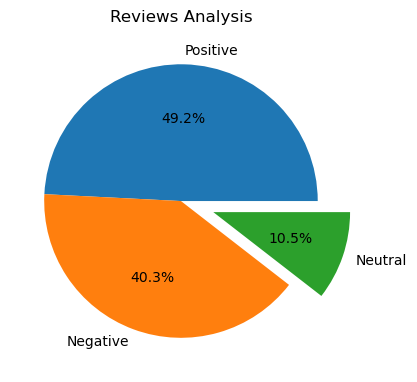

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

In [23]:
df.to_csv("BA_reviews.csv")

# Wordcloud

Word Cloud or Tag Clouds is a visualization technique for texts that are natively used for visualizing the tags or keywords from the websites

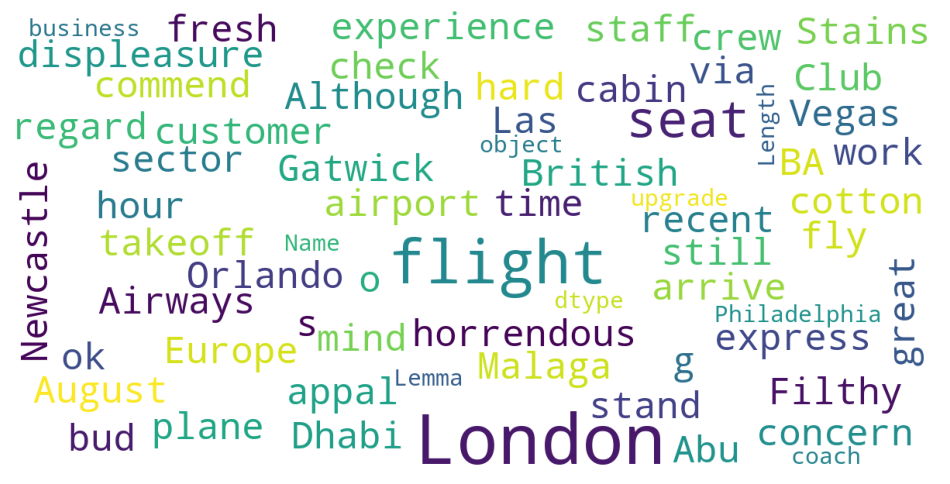

In [24]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)